<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

## <center> Assignment 4 (demo)
### <center>  Sarcasm detection with logistic regression
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) + [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).**


We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [3]:
!ls ../../../data/sarcasm/

test-balanced.csv          train-balanced-sarc.csv.gz
test-unbalanced.csv        train-balanced-sarcasm.csv


In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
train_df = pd.read_csv("../../../data/sarcasm/train-balanced-sarcasm.csv")

In [3]:
train_df.shape

(1010826, 10)

In [4]:
train_df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [5]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [7]:
train_df.dropna(subset=["comment"], inplace=True)

We notice that the dataset is indeed balanced

In [8]:
train_df["label"].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [9]:
train_texts, valid_texts, y_train, y_valid = train_test_split(
    train_df["comment"], train_df["label"], random_state=17
)

In [10]:
train_texts.head()

827869                      Should have named it Samsquanch
800568                       All that knob wants is uranus.
506459                  No their dogs gave up halfway here.
372707    I'm sure icefrog is that bad at critical self-...
548483      Thanks for your contribution to the discussion.
Name: comment, dtype: object

### Exploratory data analysis (EDA)

<AxesSubplot:>

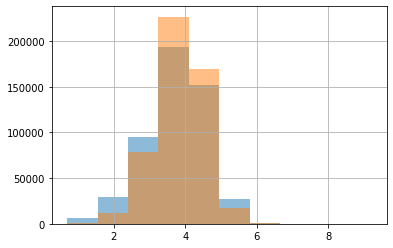

In [11]:
train_df.loc[train_df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='sorcastic', alpha=0.5)
train_df.loc[train_df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='not sorcastic', alpha=0.5)

Distribution of lengths for sarcastic and normal comments is almost the same.

In [12]:
from wordcloud import STOPWORDS, WordCloud

In [13]:
wordcloud = WordCloud(
    background_color="black",
    stopwords=STOPWORDS,
    max_words=200,
    max_font_size=100,
    random_state=17,
    width=800,
    height=400,
        
)

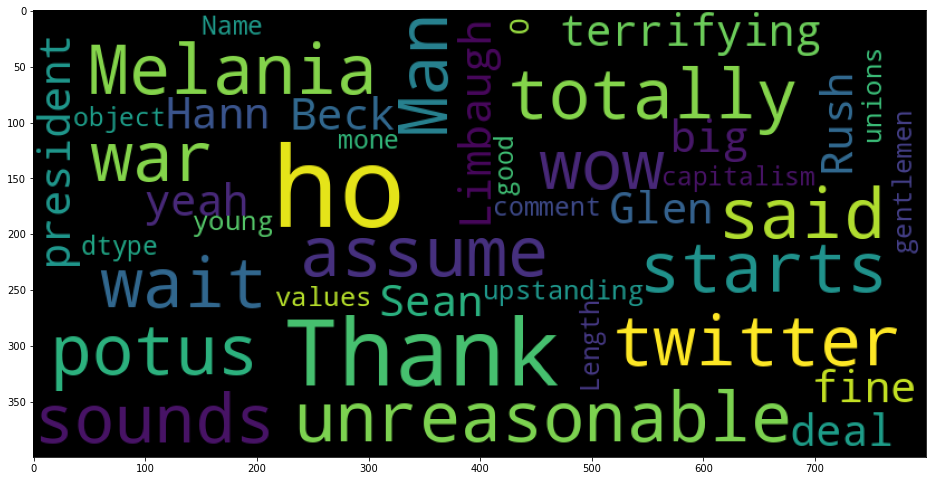

In [14]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[(train_df["label"] == 1) & (train_df["subreddit"] == 'politics'), "comment"]))
plt.imshow(wordcloud);

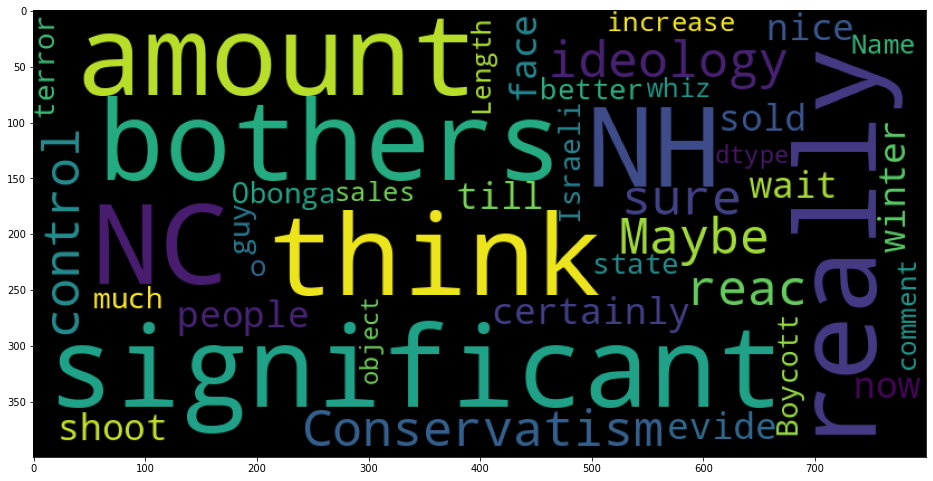

In [15]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[(train_df["label"] == 0) & (train_df["subreddit"] == 'politics'), "comment"]))
plt.imshow(wordcloud);

In [16]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [17]:
sub_df = train_df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])
sub_df.sort_values(by='sum', ascending=False).head(10)

,size,mean,sum
subreddit,,,
AskReddit,65674,0.401453,26365
politics,39493,0.605348,23907
worldnews,26376,0.642516,16947
leagueoflegends,21034,0.542312,11407
pcmasterrace,18987,0.566651,10759
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16152,0.484336,7823
todayilearned,14159,0.547567,7753


In [18]:
sub_df[sub_df['size']>1000].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3355,0.680775,2284
ShitRedditSays,1284,0.661994,850
worldnews,26376,0.642516,16947
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468


In [19]:
sub_df = train_df.groupby("author")["label"].agg([np.size, np.mean, np.sum])
sub_df[sub_df["size"] > 300].sort_values(by="mean", ascending=False).head(10)

,size,mean,sum
author,,,
NeonDisease,422,0.500000,211
ShyBiDude89,404,0.500000,202
ivsciguy,342,0.500000,171
mad-n-fla,318,0.500000,159
mindlessrabble,302,0.500000,151
pokemon_fetish,432,0.500000,216
Biffingston,845,0.499408,422


In [20]:
sub_df = (
    train_df[train_df["score"] >= 0]
    .groupby("score")["label"]
    .agg([np.size, np.mean, np.sum])
)
sub_df[sub_df["size"] > 300].sort_values(by="mean", ascending=False).head(10)

,size,mean,sum
score,,,
0,58141,0.612752,35626
20,3096,0.561370,1738
34,1071,0.556489,596
26,1874,0.554429,1039
59,315,0.552381,174
18,3951,0.551759,2180
13,7277,0.546929,3980
17,4404,0.545867,2404
40,722,0.545706,394


In [21]:
sub_df = (
    train_df[train_df["score"] < 0]
    .groupby("score")["label"]
    .agg([np.size, np.mean, np.sum])
)
sub_df[sub_df["size"] > 300].sort_values(by="mean", ascending=False).head(10)

,size,mean,sum
score,,,
-14,537,0.698324,375
-8,1852,0.696004,1289
-9,1503,0.691284,1039
-6,3088,0.688795,2127
-12,776,0.684278,531
-5,4134,0.678520,2805
-3,6736,0.676069,4554
-2,11924,0.675948,8060
-4,5436,0.673473,3661


In [22]:
sub_df = (train_df.groupby("ups")["label"]
    .agg([np.size, np.mean, np.sum])
)
sub_df[sub_df["size"] > 300].sort_values(by="mean", ascending=False).head(10)

,size,mean,sum
ups,,,
-14,488,0.709016,346
-8,1685,0.700297,1180
-9,1376,0.698401,961
-6,2801,0.697965,1955
-12,689,0.695210,479
-5,3726,0.688137,2564
-3,6042,0.685204,4140
-4,4874,0.684858,3338
-2,10756,0.684455,7362


In [23]:
sub_df = (train_df.groupby("downs")["label"]
    .agg([np.size, np.mean, np.sum])
)
sub_df[sub_df["size"] > 300].sort_values(by="mean", ascending=False).head(10)

,size,mean,sum
downs,,,
0,863333,0.511870,441914
-1,147440,0.430372,63454


## Train models

In [24]:
tf_idf = TfidfVectorizer(max_features=50000, min_df=2, ngram_range=(1, 2))
logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs', random_state=19)
tf_idf_logit_pipeline = Pipeline([('tf_idf', tf_idf), ('logit', logit)])

In [25]:
%%time
tf_idf_logit_pipeline.fit(train_texts, y_train)
valid_pred = tf_idf_logit_pipeline.predict(valid_texts)
accuracy_score(y_valid, valid_pred)

CPU times: user 27.8 s, sys: 1.18 s, total: 29 s
Wall time: 43.1 s


0.7208560551497067

In [26]:
tf_idf = TfidfVectorizer(max_features=50000, min_df=2, ngram_range=(1, 3))
logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs', random_state=19)
tf_idf_logit_pipeline = Pipeline([('tf_idf', tf_idf), ('logit', logit)])

In [27]:
%%time
tf_idf_logit_pipeline.fit(train_texts, y_train)
valid_pred = tf_idf_logit_pipeline.predict(valid_texts)
accuracy_score(y_valid, valid_pred)

CPU times: user 1min 1s, sys: 4.28 s, total: 1min 5s
Wall time: 1min 36s


0.7218374793228173

In [28]:
tf_idf = TfidfVectorizer(min_df=2, ngram_range=(1, 3))
logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs', random_state=19)
tf_idf_logit_pipeline = Pipeline([('tf_idf', tf_idf), ('logit', logit)])

In [29]:
%%time
tf_idf_logit_pipeline.fit(train_texts, y_train)
valid_pred = tf_idf_logit_pipeline.predict(valid_texts)
accuracy_score(y_valid, valid_pred)

CPU times: user 43 s, sys: 3.37 s, total: 46.3 s
Wall time: 1min 37s


0.7282048643814257

In [30]:
import eli5

eli5.show_weights(top=(20, 20),
    estimator=tf_idf_logit_pipeline.named_steps["logit"],
    vec=tf_idf_logit_pipeline.named_steps["tf_idf"],
)

/Users/kremenevskiy/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+10.259,yes because
+10.069,obviously
+9.744,clearly
+9.493,totally
+9.284,because
+8.840,yeah because
+6.415,good thing
+6.255,fault
+6.130,how dare
+6.098,don you know


### Adding subreddits

In [31]:
tf_idf_texts = TfidfVectorizer(ngram_range=(1, 3), min_df=2)
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1, 1))

In [32]:
X_train_texts = tf_idf_texts.fit_transform(train_texts)
X_valid_texts = tf_idf_texts.transform(valid_texts)

In [33]:
subreddits = train_df["subreddit"]
train_subreddits, valid_subreddits = train_test_split(subreddits, random_state=17)

In [34]:
%%time
X_train_subreddits = tf_idf_subreddits.fit_transform(train_subreddits)
X_valid_subreddits = tf_idf_subreddits.transform(valid_subreddits)

CPU times: user 2.9 s, sys: 106 ms, total: 3 s
Wall time: 3.14 s


In [35]:
from scipy.sparse import hstack

X_train = hstack([X_train_texts, X_train_subreddits])
X_valid = hstack([X_valid_texts, X_valid_subreddits])

In [36]:
logit.fit(X_train, y_train)
valid_pred = logit.predict(X_valid)
accuracy_score(y_valid, valid_pred)

0.7268158325880314

In [47]:
features = list(tf_idf_texts.get_feature_names_out()) + list(tf_idf_subreddits.get_feature_names_out())

In [59]:
features = pd.DataFrame(logit.coef_.T, features, columns=['coef']).sort_values(by='coef', ascending=False)

In [61]:
features.tail(20)

,coef
the original,-4.387866
usually,-4.391018
mostly,-4.394168
as well,-4.522929
sometimes,-4.561683
not sure,-4.656734
true but,-4.701609
generally,-4.705162
but not,-4.860403
sadly,-4.900480


In [62]:
features.head(20)

,coef
yes because,13.381856
because,12.592237
yeah because,9.947467
clearly,9.555691
totally,8.187251
obviously,8.124218
good thing,7.916782
shitlord,7.631027
forgot,7.348035
fault,7.295203


### Try count vectorizer

In [48]:
vectorizer = CountVectorizer(ngram_range=(1,3), min_df=2, max_features=50000)
train_vec = vectorizer.fit_transform(train_texts)
valid_vec = vectorizer.transform(valid_texts)

In [49]:
logit.fit(train_vec, y_train)
valid_pred = logit.predict(valid_vec)
accuracy_score(y_valid, valid_pred)

0.7209233301938313

/Users/kremenevskiy/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions